## 随机变量X的含义  
随机变量是表示随机现象各种结果的变量，我们关注的是随机过程映射到数值的函数    
例如，我们可以定义X为n次抛硬币后正面的次数，那么可以定义X=3为n次抛硬币后，出现3次正面的次数，则可以定义P(X=3)为n次抛硬币后出现3次正面的概率

## 概率密度函数
### 二项分布  
 
**二项分布公式**  
服从二项分布的随机变量X表示在N个独立的是/非试验中成功的次数，其中每次试验的成功概率为p。
$$
P(X=k) = \frac{N!}{k!(N-k)!}p^k(1-p)^{N-k}
$$
N:总体数目  
k:事件k  
p:事件k独立抽样的概率

In [3]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

N = 10
k = np.arange(N+1)
p = 0.2
binomial = ss.binom.pmf(k,N,p)
print(binomial)

[1.07374182e-01 2.68435456e-01 3.01989888e-01 2.01326592e-01
 8.80803840e-02 2.64241152e-02 5.50502400e-03 7.86432000e-04
 7.37280000e-05 4.09600000e-06 1.02400000e-07]


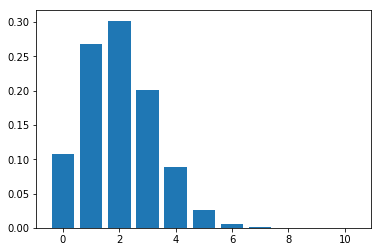

In [4]:
plt.bar(k,binomial)
plt.show()

In [5]:
#概率质量/密度函数
np.sum(binomial)

1.0000000000000002

### 期望值E(X)    
随机变量的期望值其实就是总体的均值，在实际情况下，我们往往拿不到总体，则需要通过样本期望值求总体的均值  
**求和（数字出现的频率*对应的数字）**    
二项分布的期望值公式
$$
E(X) = \sum_{k=0}^NP(X=k)*X = Np
$$
**N为试验次数**  
<img src="./二项分布.jpeg">
注意：期望值不等于可能性最大的那个值，但在二项分布中可以这么理解  


In [4]:
ex = np.sum(binomial*k)
ex

1.0000000000000009

### 泊松分布  
泊松分布适合于描述单位时间（或空间）内随机事件发生的次数。如某一服务设施在一定时间内到达的人数，电话交换机接到呼叫的次数，汽车站台的候客人数，机器出现的故障数，自然灾害发生的次数，一块产品上的缺陷数，显微镜下单位分区内的细菌分布数等等。  
基础极限函数
$$
\lim_{x \rightarrow \infty}(1+\frac{a}{x})^x = e^a
$$
**泊松分布概率函数**
$$
P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}
$$
$\lambda$:单位时间内发生事件的平均值

泊松分布与二项分布的关系：  
泊松分布是二项分布的极限表达
<img src='./泊松分布.jpeg'/>

In [5]:
rate = 2
k = np.arange(0,10)
y = ss.poisson.pmf(k,rate)
y

array([  1.35335283e-01,   2.70670566e-01,   2.70670566e-01,
         1.80447044e-01,   9.02235222e-02,   3.60894089e-02,
         1.20298030e-02,   3.43708656e-03,   8.59271640e-04,
         1.90949253e-04])

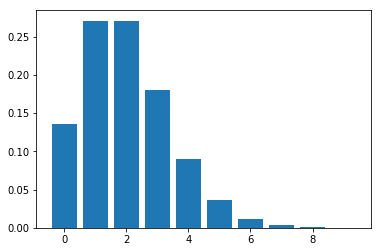

In [6]:
plt.bar(k,y)
plt.show()

In [7]:
np.sum(y)

0.99995350192498278

### 正态分布
**正态分布概率密度函数**
$$
p(X=x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$
$\sigma$:标准差  
$\mu$:E(X) 
  
    
扩展  
- 二项分布的试验次数趋于无穷时，其概率密度值收敛于正态分布函数  
- 标准正态分布为$\mu = 0$，$\sigma = 1$的正态分布  
  
**注意：对于连续分布密度函数，其高度没有意义，面积才有意义，真正要考虑的是概率密度曲线下的积分面积,例如，要求下雨为4.5厘米到5.5厘米的概率**
$$
\int_{4.5}^{5.5}p(x)dx
$$

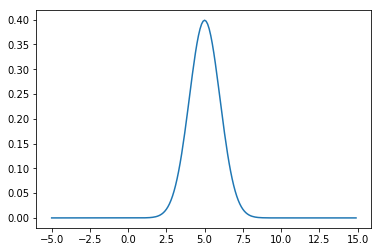

In [7]:
mu = 5
sigma = 1
x = np.arange(-5,15,0.1)
y = ss.norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x,y)
plt.show()

In [9]:
ss.norm.cdf(5,loc=mu, scale=sigma)

0.5

In [10]:
def calArea(x1,x2,mu,sigma):
    return ss.norm.cdf(x1,loc=mu,scale=sigma)-ss.norm.cdf(x2,loc=mu,scale=sigma)

print(calArea(5.5,4.5,mu,sigma))


0.382924922548


### 68-95-99.7法则

In [11]:
print(calArea(mu+sigma,mu-sigma,mu,sigma))
print(calArea(mu+2*sigma,mu-2*sigma,mu,sigma))
print(calArea(mu+3*sigma,mu-3*sigma,mu,sigma))

0.682689492137
0.954499736104
0.997300203937


## 中心极限定理  
**多个随机变量的综合作用，最终会得到正态分布**


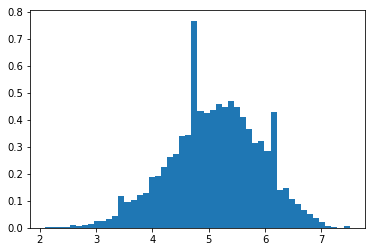

5.110549999999993
0.8065418138571684


In [8]:
import random
def random_index(rate, count):
    result = []
    # """随机变量的概率函数"""
    # 参数rate为list<int>
    # 返回概率事件的下标索引
    for i in range(count):
        start = 0
        index = 0
        randnum = random.randint(1, sum(rate))
        for index, scope in enumerate(rate):
            start += scope
            if randnum <= start:
                break
        result.append(index)
    return result
#预设的分布概率函数
rate = [10,5,2,10,3,15,20,15,20]

import pandas as pd

k = 10000
samples = pd.Series([])

for i in range(k):
    samples = samples.append(pd.Series([np.mean(random_index(rate,10))]))
plt.hist(samples,bins=50,density=1)
plt.show()
print(np.mean(samples))
print(np.std(samples))

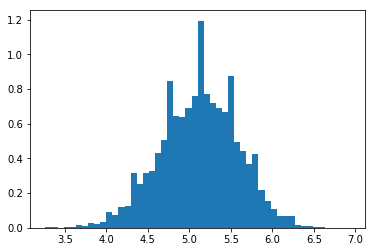

5.117926666666671
0.4658556895768397


In [9]:
samples = pd.Series([])
for i in range(k):
    samples = samples.append(pd.Series([np.mean(random_index(rate,30))]))
plt.hist(samples,bins=50,density=1)
plt.show()
print(np.mean(samples))
print(np.std(samples))

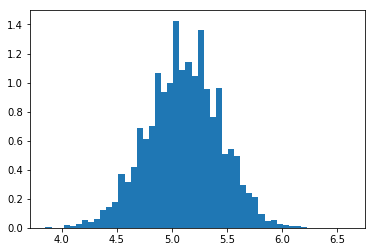

5.107835000000009
0.3298461366851371


In [10]:
samples = pd.Series([])
for i in range(k):
    samples = samples.append(pd.Series([np.mean(random_index(rate,60))]))
plt.hist(samples,bins=50,density=1)
plt.show()
print(np.mean(samples))
print(np.std(samples))

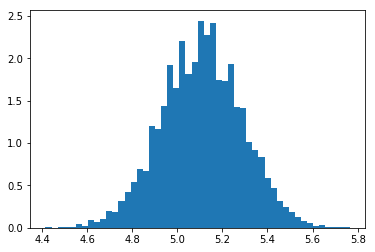

5.107174499999995
0.17863498831345972


In [15]:
samples = pd.Series([])
for i in range(k):
    samples = samples.append(pd.Series([np.mean(random_index(rate,200))]))
plt.hist(samples,bins=50,density=1)
plt.show()
print(np.mean(samples))
print(np.std(samples))

结论：对于从总体中抽样n个样本，并将此实验反复进行，随着实验次数的增加，样本集的均值将趋近总体均值。当n趋于$\infty$，将表现为一个完全的正态分布
$$\sigma^2_{samples}=\frac{\sigma^2_{total}}{n}$$
$$$$

#### 小试牛刀
Q1: 已知成年男性每天平均喝水2L，标准差0.7L，我们计划安排一次全天出行，共有50个成年男性参加，准备了110L水，有多大的概率出现水不够喝的情况？  

p(水不够喝) = p(所需要喝的水超过110L) = p(平均一个成年男子喝水超过2.2L)  
因为按照中心极限定理，样本集的均值与总体均值相同，而样本的标准差$\sigma = \frac{0.7}{\sqrt{n}} = \frac{0.7}{\sqrt{50}} = 0.089$  
所以问题转换为求一个均值为2，标准差为0.089的正态分布中，大于2.2之后的面积，也可以理解为样本均值大于均值右侧2.02个标准差的概率，约等于2.17%
    
Q2:有个苹果园，今年预计收获10万个苹果，随机抽样了36个苹果组成样本进行测量，样本的均值为112g，标准差为40g，问20万个苹果的重量均值处于100g到124g的概率是多少？

样本多次采用的均值与总体均值趋近，等于讨论按照36个为一批的抽样，其均值落在均值为112，标准差为$\frac{40}{\sqrt{36}}$的正态分布中，x坐标从100到124的对应的概率密度函数积分面积是多少。即为 calArea(124,100,112,6.67)=0.928=92.8%，所以我们认为总体的均值在100到124的概率为92.8%，也可以叫置信度为92.8%

In [16]:
calArea(124,100,112,6.67)

0.92799720747162007

### t分布
中心极限定理指出在任意总体分布的情况下，进行随机抽样n个样本并计算均值n_mean，将此进行m次，当m趋于无穷大的时候，其均值的分布服从总体分布的均值为均值，总体分布的标准差除以根号n为标准差的正态分布  
由此性质，我们可以根据样本对总体的性质进行推断。但此处如果n不够大（通常以30为界限）,则样本均值的分布更偏向于服从总体分布的均值为均值，总体分布的标准差除以根号n为标准差的t分布

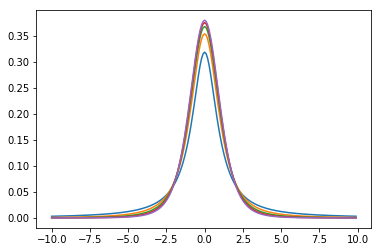

In [17]:
from scipy.stats import t
X = np.arange(-10,10,0.1)
Y1 = t.pdf(X,1)
plt.plot(X,Y1)
Y2 = t.pdf(X,2)
plt.plot(X,Y2)
Y3 = t.pdf(X,3)
plt.plot(X,Y3)
Y4 = t.pdf(X,4)
plt.plot(X,Y4)
Y5 = t.pdf(X,5)
plt.plot(X,Y5)
plt.show()

例题：7个患者在服用新药3个月后测量血压，其血压上升值分别为 1.5, 2.9, 0.9 3.9, 3.2, 3.1, 1.9, 对总体分布建立一个95%置信区间  
解答：可以认为总体分布是一个正态分布，因为生物过程是由大量随机事件构成，而大量随机事件综合作用之和接近于正态分布，但样本量较少，不能认为样本量也为正态分布，用t分布更为合适

In [26]:
x = np.array([1.5, 2.9, 0.9, 3.9, 3.2, 3.1, 1.9])
mean = np.mean(x)
print(mean)
#自由度为7-1 = 6，且为双侧
t.ppf(1-0.05/2, 6)
#没有总体的标准差，用样本的标准差作为总体的标准差的最好估计
np.std(x)/np.sqrt(7)

t.ppf(1-0.05/2, 6) * np.std(x)/np.sqrt(7)
#有95%的概率 2.48在抽样分布实际均值周围0.91范围内，也就是95%几率抽样分布均值在样本均值2.48周围0.91范围内，即总体均值有95%概率在[1.57，3.39]中

2.48571428571


0.9174552009104181

#### 数学小知识
$$E(A + B) = E(A) + E(B)$$
$$ 
Var(A + B) = Var(A) + Var(B)
$$
$$ 
Var(A - B) = Var(A) + Var(B)
$$

### 卡方分布
常用于检验理论分布于观测到的实际分布结果吻合的结果有多好  
设随机变量X服从均值为0，方差为1的标准正态分布  
- 另$Q_1 = X^2$，则可记作$Q_1 服从 \chi^2_1的卡方分布$
- 另$Q_2 = X^2_1 + X^2_2$，则可记作$Q_2 服从 \chi^2_2的卡方分布$
- 另$Q_3 = X^2_1 + X^2_2 + X^2_3$，则可记作$Q_3 服从 \chi^2_3的卡方分布$

#### 自由度
自由度(degree of freedom, df)指的是计算某一统计量时，取值不受限制的变量个数。

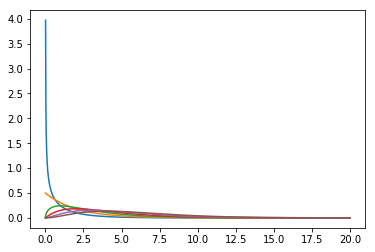

In [27]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0, 20, 0.01)
plt.plot(X,chi2.pdf(X,1))
plt.plot(X, chi2.pdf(X, 2))
plt.plot(X, chi2.pdf(X, 3))
plt.plot(X, chi2.pdf(X, 4))
plt.plot(X, chi2.pdf(X, 5))
plt.plot(X, chi2.pdf(X, 6))
plt.show()

期望值（%） | 10% | 10% | 15% | 20% | 30% | 15% 
:-: | :-: | :-: | :-: | :-: | :-: | :-:
实际 | 30 | 14 | 34 | 45 | 57 | 20

问题：实际观测到的值是否符合期望的分布？  
解答：计算卡方统计量，取显著性水平5%  
定义H0：观测到的分布是符合期望值的  
定义H1：观测到的分布是不符合期望值的  
计算假设H0成立的情况下，取到实际观测值的概率是多少，是否小于显著性水平5%？

In [28]:
X = np.array([30, 14, 34, 45, 57 ,20])
total = np.sum(X)
prob = np.array([0.1,0.1,0.15,0.20,0.30,0.15])
X_prob = total * prob
kafang = np.sum(np.power(X_prob - X,2) / X_prob)
#计算自由度为5的卡方分布在0.95概率面积的横坐标，比较横坐标与kafang的大小
p95 = chi2.ppf(0.95,5)
print(p95)
print(kafang)
#计算出来的值大于95%，也即是抽样到目前样本分布的概率小于5%，所以可以认为实际观测到的值不符合期望的分布

11.0704976935
11.4416666667


#### 卡方分布列联表
组别 | 一组 | 二组 | 三组
:-: | :-: | :-: | :-: 
生病 | 20 | 30 | 30
不生病 | 100 | 110 | 90
总和 | 120| 140 | 120  
  
问题：药是否有效果？  
解答：   
定义H0：药没效果  
定义H1: 药有效果  
显著性水平10%

In [29]:
import scipy.stats as ss
X_sick = np.array([20,30,30])
X_unsick = np.array([100,110,90])
X_total = X_sick + X_unsick
#计算H0成立，生病与不生病的理论概率
total = np.sum(X_sick)+np.sum(X_unsick)
p_sick = np.sum(X_sick)/total
p_unsick = 1 - p_sick

#计算H0成立，卡方统计量
X_sick_theory = X_total * p_sick
X_unsick_theory = X_total * p_unsick
kafang = np.sum(np.power(X_sick-X_sick_theory,2)/X_sick_theory) +  np.sum(np.power(X_unsick-X_unsick_theory,2)/X_unsick_theory)
#讨论自由度，一般的，m行n列的列联表自由度为(m-1)*(n-1)，此处为(2-1)*(3_1) = 2
#所以需要检查自由度为2的卡方分布在显著性水平为10%的横坐标并进行比较
p90 = chi2.ppf(0.90,2)
print(p90)
print(kafang)
#因为卡方统计量不满足10%的显著性水平，不能推翻H0假设


4.60517018599
2.52579365079


### 方差分析
<img src='./data0.png'/>


In [30]:
import pandas as pd
import math
df = pd.DataFrame(data=[[3,5,5],[2,3,6],[1,4,7]],columns=['1组','2组','3组'])
data = np.array(df)
mean = np.mean(data)
SST = np.sum(np.power(data-mean,2))
print(SST)
x1 = np.array(df["1组"])
x2 = np.array(df["2组"])
x3 = np.array(df["3组"])
SSW = np.sum(np.power(x1-np.mean(x1),2)) + np.sum(np.power(x2-np.mean(x2),2)) + np.sum(np.power(x3-np.mean(x3),2))
print(SSW)
SSB = 3*math.pow(np.mean(x1)-mean,2)+3*math.pow(np.mean(x2)-mean,2)+3*math.pow(np.mean(x3)-mean,2)
print(SSB)
#可以认为总体方差30主要由SSB即组间方差构成

30.0
6.0
24.0


### F统计量
组间平方和除以其自由度/组内平方和除以其自由度
$$
    F = \frac{\frac{SSB}{m-1}}{\frac{SSW}{m(n-1)}}
$$
  
  
问题：以上3组的抽样是否没有差别，及各组的总体均值相等？  
H0: 均值相等，各组没有区别  
H1: 均值不相等，各组有区别  
方案：假设H0成立，计算F统计量，统计概率，显著性取10%

In [31]:
f = (24 / 2) / (6 / 6)
print(f)
from scipy.stats import f
f.ppf(0.9, 2, 6)
#计算得到的f统计量远大于3.46，拒绝h0，h1成立

12.0


3.4633040700956514

In [50]:
#利用scipy的f_oneway函数可以方便的计算f统计量，从而判断各组的抽样是否存在区别
ss.f_oneway([3,2,1],[5,3,4],[5,6,7])

F_onewayResult(statistic=12.0, pvalue=0.0080000000000000019)

### 协方差
协方差（Covariance）在概率论和统计学中用于衡量两个变量的总体误差。而方差是协方差的一种特殊情况，即当两个变量是相同的情况。
$$
Cov(X,Y) = \frac{1}{N - 1}\Sigma_{i=1}^{N}(X_i-\overline X)(Y_i - \overline Y)
$$
协方差描述了两个样本之间的相关关系，正相关>0，负相关<0，不相关=0（注意，0不代表真的不相关，只能说是线性不相关）  

<img src='./data1.png'/>


In [32]:
X = [1,2,3,4]
np.cov(X)


array(1.6666666666666665)

In [33]:
x=np.array([[1 ,5 ,6] ,[4 ,3 ,9 ],[ 4 ,2 ,9],[ 4 ,7 ,2]])
print(x)
np.cov(x)

[[1 5 6]
 [4 3 9]
 [4 2 9]
 [4 7 2]]


array([[  7.        ,   4.5       ,   4.        ,  -0.5       ],
       [  4.5       ,  10.33333333,  11.5       ,  -7.16666667],
       [  4.        ,  11.5       ,  13.        ,  -8.5       ],
       [ -0.5       ,  -7.16666667,  -8.5       ,   6.33333333]])

### 相关系数
$$
Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$
就是用X、Y的协方差除以X的标准差和Y的标准差  
所以，相关系数也可以看成协方差：一种剔除了两个变量量纲影响、标准化后的特殊协方差。  
  
既然是一种特殊的协方差，那它：
1. 也可以反映两个变量变化时是同向还是反向，如果同向变化就为正，反向变化就为负。
2. 由于它是标准化后的协方差，因此更重要的特性来了：它消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度。

In [34]:
#相关系数
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5, 0.4, 1.2, 2.5, 1.1,0.7, 0.1])
s1.corr(s2)

0.93337296004659243

In [58]:
#dataframe也可以求相关系数，不过是以列为单位，运用此方法可以很方便的求出相关系数矩阵，并进行绘图
s = pd.DataFrame(np.array([s1,s2]).T)
s.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


### 线性回归
设有一系列点(x1,y1),(x2,y2),(x3,y3)...(xn,yn),希望能够有一条直线方程y=ax+b可以描述这些点，求该直线方程的参数a和b的过程就是线性回归的过程。  
思考：什么样的直线是好的直线？  
最好的直线是每一个点离直线的距离最近的直线！！！  
<img src='./data2.png'/>

#### R2系数
决定系数反应了y的波动有多少百分比能被x的波动所描述，即表征依变数Y的变异中有多少百分比,可由控制的自变数X来解释  
意义：拟合优度越大，自变量对因变量的解释程度越高，自变量引起的变动占总变动的百分比高。观察点在回归直线附近越密集。  

取值范围：0-1.  
$$R2 = 1 - \frac{SE_{line}}{SE_{\overline Y}} = 1 - \frac{\Sigma_{i=1}^{N}(y_n-(ax_n+b)^2)}{\Sigma_{i=1}^{N}(y_n-\overline y)^2}$$

[[ 3.00358568]]
[ 4.50181232]


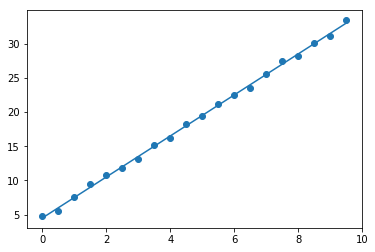

[[ 2.35714286]
 [ 2.92857143]
 [ 3.5       ]
 [ 5.21428571]]
[[1]
 [2]
 [3]
 [6]]


In [8]:
#线性回归
x = np.arange(0,10,0.5).astype(np.float).reshape([20,1])
y = x*3 + 4 + np.random.rand(20,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res = reg.fit(x,y)
y_pred = reg.predict(x)
print(reg.coef_)
#y = wx + b
print(reg.intercept_)

#绘图
plt.scatter(x,y)
plt.plot(x,y_pred)

plt.show()
#作业：利用python计算R2统计量

### 假设检验
假设检验常常用于从样本推断总体或者推断样本之间的关系，常见步骤如下：  
1. 建立原假设H0，H0的反命题H1，也叫备择假设
2. 选择检验统计量
3. 根据显著水平（一般为0.05，意味着要有95%的值复合H0分布），确定拒绝域
4. 计算p值或样本统计值，做出判断  

例：某洗衣粉工厂认为他们的洗衣粉每袋的重量符合均值为500克，标准差2克的正态分布，现对洗衣粉进行抽样，得到每袋洗衣粉的重量如下：501.8,502.4,499,500.3,504.5,498.2,505.6，请问从样本是否可以认为总体分布是正确的？  
解答：  
H0：总体符合均值500，标准差2的正态分布
H1：总体不符合均值500，标准差2的正态分布  
取显著水平为5%

In [35]:
import math
x = np.array([501.8,502.4,499,500.3,504.5,498.2,505.6])
sigma = 2/math.sqrt(7)
#计算Z分数
z = (np.mean(x)-500)/sigma
print(z)
if(z>2):
    print("H1成立")
else:
    print("H0成立")


2.22999039075
H1成立


In [25]:
ss.normaltest(x)

ValueError: skewtest is not valid with less than 8 samples; 7 samples were given.